In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
#constants
G = 6.6743*10**(-11) #m^3/kg/s^2
g_0 = 9.81 #m/s^2
M_e = 5.972*10**(24) #kg mass of earth
M_m = 7.35*10**(22) #kg mass of moon
R_e = 6378.1*10**3 #m radius of earth
R_m = 1738.1*10**3 #m radius of moon
rot = 7.272*10**(-5) #rad/s earths rotation rate at equator

In [56]:
d = 4*10**3 #m
t_squared = 2*d/g_0
t = np.sqrt(t_squared)
print(t)

28.55686245854129


In [57]:
def force(t, x, g, alpha, gamma):
    y, v = x
    dydt = v
    dvdt = -g + alpha*np.abs(v)**gamma
    return [dydt, dvdt]

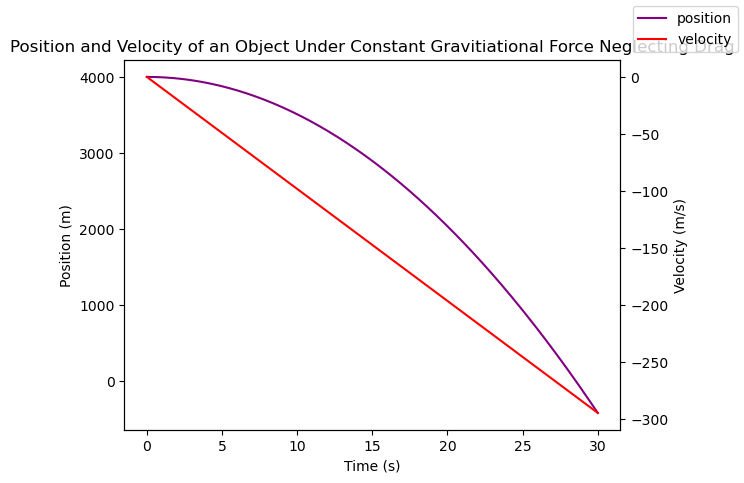

In [58]:
g = g_0
alpha = 0
gamma = 0

t1 = 0
t2 = 30 #s
t_vals_fine = np.linspace(t1,t2,200)

soln = scipy.integrate.solve_ivp(fun=force,
                         t_span = (t1,t2),
                         y0 = [4000,0], 
                         args=(g, alpha, gamma),
                                 t_eval=t_vals_fine)

force_t = soln.t
y_soln = soln.y[0]
v_soln = soln.y[1]


fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(force_t, y_soln, label = 'position', c ='purple')
ax2.plot(force_t, v_soln, label = 'velocity', c = 'r')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position (m)')
ax2.set_ylabel('Velocity (m/s)')
ax.set_title('Position and Velocity of an Object Under Constant Gravitiational Force Neglecting Drag')
fig.legend()

In [59]:
def event (t, x, g, alpha, gamma):
    y, v = x
    return y

event.terminal=True 
event_soln = scipy.integrate.solve_ivp(fun=force,t_span=(t1,t2), y0=[4000,0] ,t_eval = t_vals_fine, args=(g, alpha, gamma), events=event)
print(event_soln.t_events)

[array([28.55686246])]


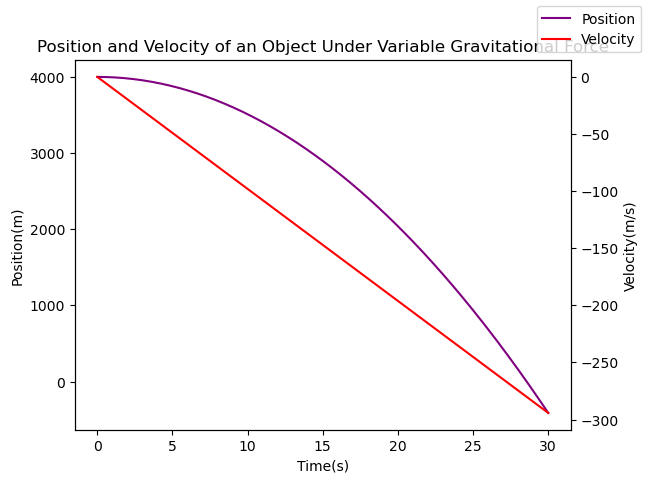

In [60]:
def g(r):
    return g_0*(r/R_e)

def force_gy(t, x, g, alpha, gamma):
    y, v = x
    dydt = v
    dvdt = -g(R_e-y) + alpha*np.abs(v)**gamma
    return [dydt, dvdt]

t0 = 0
tf = 30
t2_vals_fine = np.linspace(t0,tf,200)

soln_2 = scipy.integrate.solve_ivp(fun=force_gy,
                         t_span = (t0,tf),
                         y0 = [4000,0], 
                         args=(g, alpha, gamma),
                                 t_eval=t2_vals_fine)
force_2_t = soln_2.t
y_2_soln = soln_2.y[0]
v_2_soln = soln_2.y[1]

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(force_2_t, y_2_soln, label='Position', c='purple')
ax2.plot(force_2_t, v_2_soln, label='Velocity', c='r')
ax.set_xlabel('Time(s)')
ax.set_ylabel('Position(m)')
ax2.set_ylabel('Velocity(m/s)')
ax.set_title('Position and Velocity of an Object Under Variable Gravitational Force')
fig.legend()

In [61]:
def event (t, x, g, alpha, gamma):
    y, v = x
    return y

event.terminal=True 
event_2_soln = scipy.integrate.solve_ivp(fun=force_gy,t_span=(t0,tf), y0=[4000,0] ,t_eval = t2_vals_fine, args=(g, alpha, gamma), events=event)
print(event_2_soln.t_events)

[array([28.5643277])]


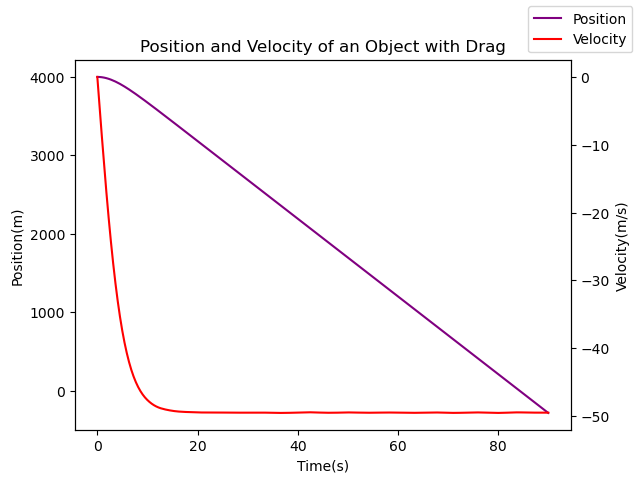

In [62]:
alpha_2 = 0.004
gamma_2 = 2

t_start = 0
t_stop = 90
t3_vals_fine = np.linspace(t_start,t_stop,200)

def force_damp(t, x, g, alpha_2, gamma_2):
    y, v = x
    dydt = v
    dvdt = -g(R_e-y) + alpha_2*np.abs(v)**gamma_2
    return [dydt, dvdt]

soln_3 = scipy.integrate.solve_ivp(fun=force_damp,
                         t_span = (t_start,t_stop),
                         y0 = [4000,0], 
                         args=(g, alpha_2, gamma_2),
                                 t_eval=t3_vals_fine)
force_3_t = soln_3.t
y_3_soln = soln_3.y[0]
v_3_soln = soln_3.y[1]

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(force_3_t, y_3_soln, label='Position', c='purple')
ax2.plot(force_3_t, v_3_soln, label='Velocity', c='r')
ax.set_xlabel('Time(s)')
ax.set_ylabel('Position(m)')
ax2.set_ylabel('Velocity(m/s)')
ax.set_title('Position and Velocity of an Object with Drag')
fig.legend()

In [63]:
def event (t, x, g, alpha_2, gamma_2):
    y, v = x
    return y

event.terminal=True 
event_3_soln = scipy.integrate.solve_ivp(fun=force_damp,t_span=(t_start,t_stop), y0=[4000,0] ,t_eval = t3_vals_fine, args=(g, alpha_2, gamma_2), events=event)
print(event_3_soln.t_events)

[array([84.28131452])]


Text(0.5, 1.0, 'Tranverse Velocity as a Function of Depth')

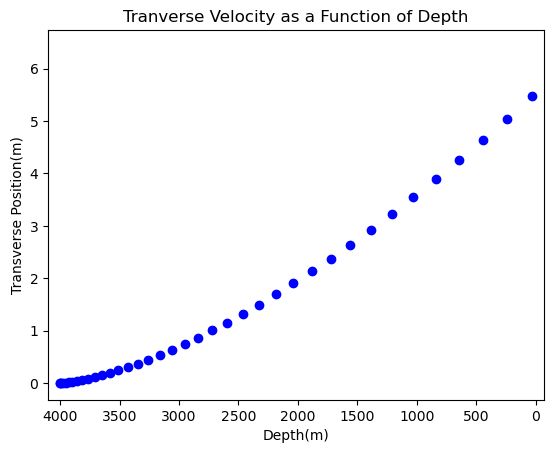

In [64]:
def force_corr(t, x, g, alpha, gamma):
    x_pos, y_pos, vx, vy = x
    dxdt, dydt = vx, vy
    dvdt_x = 2*rot*np.abs(vy) + alpha*np.abs(vx)**gamma
    dvdt_y = -g(R_e-y_pos) + alpha*np.abs(vy)**gamma - 2*rot*np.abs(vx)
    return [dxdt, dydt, dvdt_x, dvdt_y]

t_0 = 0
t_f = 30
t4_vals_fine = np.linspace(t_0,t_f,40)

soln_corr = scipy.integrate.solve_ivp(fun=force_corr,
                         t_span = (t_0, t_f),
                         y0 = [0,4000,0,0], 
                         args=(g, alpha, gamma),
                                 t_eval=t4_vals_fine)
force_corr_t = soln_corr.t
x_corr_soln = soln_corr.y[0]
y_corr_soln = soln_corr.y[1]
vx_soln = soln_corr.y[2]
vy_soln = soln_corr.y[3]

fig, ax = plt.subplots()
ax.scatter(y_corr_soln, x_corr_soln, c='b')
ax.set_xlim(4100, -70)
ax.set_xlabel('Depth(m)')
ax.set_ylabel('Transverse Position(m)')
ax.set_title('Tranverse Velocity as a Function of Depth')

Text(0.5, 1.0, 'Tranverse Velocity as a Function of Depth with Drag')

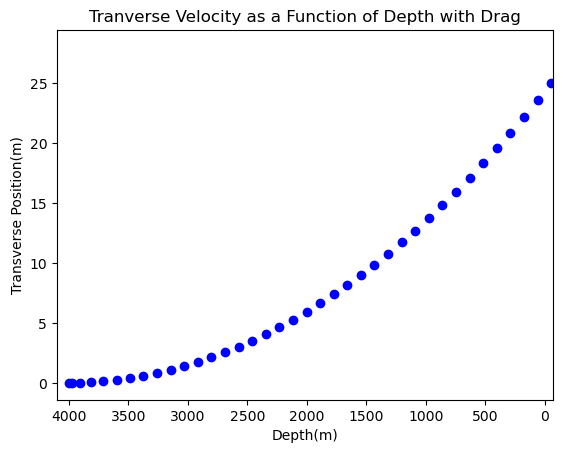

In [34]:
def force_damp_corr(t, x, g, alpha_2, gamma_2):
    x_pos, y_pos, vx, vy = x
    dxdt, dydt = vx, vy
    dvdt_x = 2*rot*np.abs(vy) + alpha_2*np.abs(vx)**gamma_2
    dvdt_y = -g(R_e-y_pos) + alpha_2*np.abs(vy)**gamma_2 - 2*rot*np.abs(vx)
    return [dxdt, dydt, dvdt_x, dvdt_y]

t_1 = 0
t_2 = 90
t5_vals_fine = np.linspace(t_1,t_2,40)

soln_damp_corr = scipy.integrate.solve_ivp(fun=force_damp_corr,
                         t_span = (t_1, t_2),
                         y0 = [0,4000,0,0], 
                         args=(g, alpha_2, gamma_2),
                                 t_eval=t5_vals_fine)

force_damp_corr_t = soln_damp_corr.t
x_damp_corr_soln = soln_damp_corr.y[0]
y_damp_corr_soln = soln_damp_corr.y[1]
vx_damp_soln = soln_damp_corr.y[2]
vy_damp_soln = soln_damp_corr.y[3]

fig, ax = plt.subplots()
ax.scatter(y_damp_corr_soln, x_damp_corr_soln, c='b')
ax.set_xlim(4100, -70)
ax.set_xlabel('Depth(m)')
ax.set_ylabel('Transverse Position(m)')
ax.set_title('Tranverse Velocity as a Function of Depth with Drag')

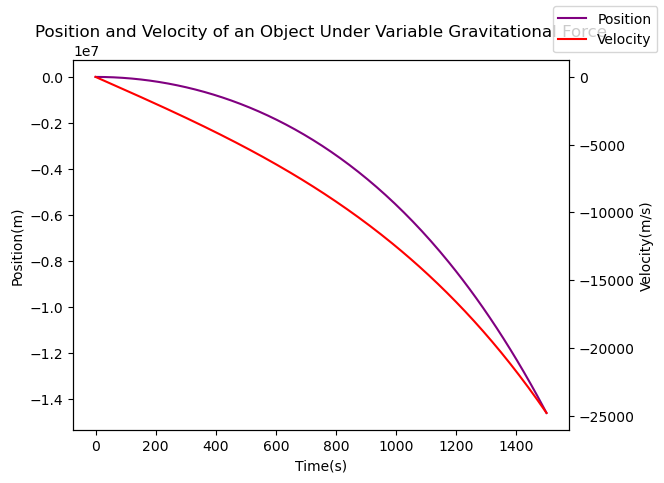

In [68]:
def g(r):
    return g_0*(r/R_e)

def force_inf(t, x, g, alpha, gamma):
    y, v = x
    dydt = v
    dvdt = -g(R_e-y) + alpha*np.abs(v)**gamma
    return [dydt, dvdt]

t_begin = 0
t_end = 1500
t6_vals_fine = np.linspace(t_begin,t_end,200)

soln_6 = scipy.integrate.solve_ivp(fun=force_inf,
                         t_span = (t_begin,t_end),
                         y0 = [0,0], 
                         args=(g, alpha, gamma),
                                 t_eval=t6_vals_fine)
force_6_t = soln_6.t
y_6_soln = soln_6.y[0]
v_6_soln = soln_6.y[1]

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.plot(force_6_t, y_6_soln, label='Position', c='purple')
ax2.plot(force_6_t, v_6_soln, label='Velocity', c='r')
ax.set_xlabel('Time(s)')
ax.set_ylabel('Position(m)')
ax2.set_ylabel('Velocity(m/s)')
ax.set_title('Position and Velocity of an Object Under Variable Gravitational Force')
fig.legend()

In [76]:
def event (t, x, g, alpha, gamma):
    y, v = x
    return y+(2*R_e)

event.terminal=True 
event_6_soln = scipy.integrate.solve_ivp(fun=force_inf,t_span=(t_begin,t_end), y0=[0,0] ,t_eval = t6_vals_fine, args=(g, alpha, gamma), events=event)
print(event_6_soln.t_events)

def event_2 (t, x, g, alpha, gamma):
    y, v = x
    return y+R_e

event.terminal=True 
event_7_soln = scipy.integrate.solve_ivp(fun=force_inf,t_span=(t_begin,t_end), y0=[0,0] ,t_eval = t6_vals_fine, args=(g, alpha, gamma), events=event_2)
print(event_7_soln.t_events, event_7_soln.y_events[1])

[array([1421.3041103])]


IndexError: index 1 is out of bounds for axis 0 with size 1